In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import darknet
from helpers import *

# Loading the data

In [2]:
cfg_file = 'cfg/yolov3.cfg'
weight_file = 'weights/yolov3.weights'
names_file = 'data/coco.names'

m = darknet.Darknet(cfg_file)
m.load_weights(weight_file)

classnames = load_class_names(names_file)

In [3]:
len(classnames)

80

In [4]:
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

# Loading the image and resizing it

Text(0.5, 1.0, 'Resized Image (416, 416, 3)')

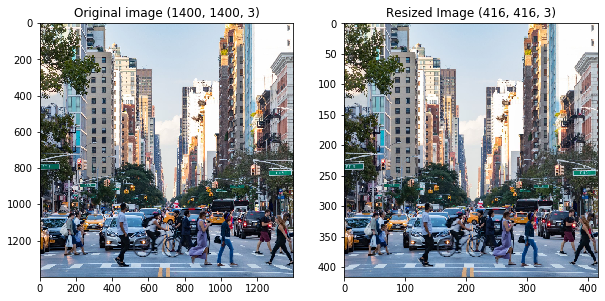

In [5]:
img = cv2.imread('images/ny_street.jpg')

original_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

resized_image = cv2.resize(original_image,(m.width,m.height))

f , (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.imshow(original_image)
ax1.set_title("Original image {}".format(original_image.shape))

ax2.imshow(resized_image)
ax2.set_title("Resized Image {}".format(resized_image.shape))

# Object detection

No. of Objects detected: 27
Time Taken: 1.2561049461364746 sec
Objects Found and Confidence Level:

1. person: 1.000000
2. person: 1.000000
3. person: 1.000000
4. person: 1.000000
5. person: 1.000000
6. car: 0.999702
7. person: 0.999995
8. truck: 0.686647
9. car: 0.999868
10. person: 0.999999
11. bicycle: 0.999992
12. car: 0.989792
13. person: 0.999997
14. car: 0.874269
15. traffic light: 1.000000
16. car: 0.999756
17. traffic light: 1.000000
18. traffic light: 1.000000
19. person: 0.999351
20. traffic light: 1.000000
21. traffic light: 1.000000
22. handbag: 0.998318
23. traffic light: 1.000000
24. traffic light: 1.000000
25. traffic light: 0.999999
26. car: 0.999985
27. traffic light: 0.999998


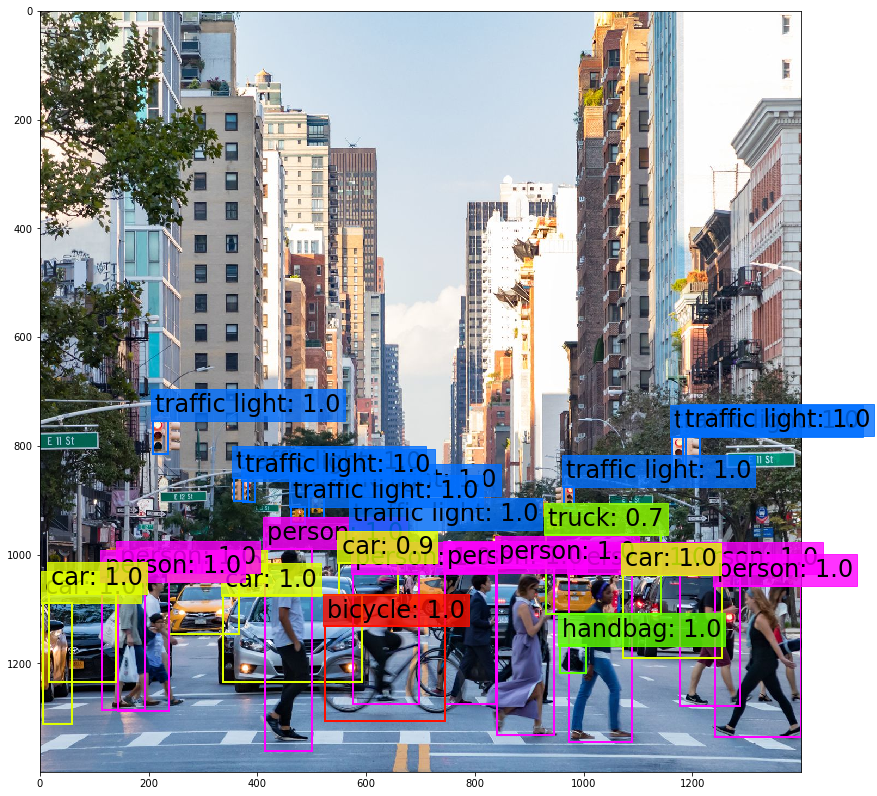

In [6]:
plt.rcParams['figure.figsize'] = [24.0,14.0]

nms_thresh = 0.6
iou_thresh = 0.4

boxes = detect_objects(m,resized_image,iou_thresh,nms_thresh)
print_objects(boxes,classnames)
plot_boxes(original_image,boxes,classnames,plot_labels=True)